Kernel: linear, C: 0.01
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

--------------------------------------------------
Kernel: poly, C: 0.01
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

-------------------------

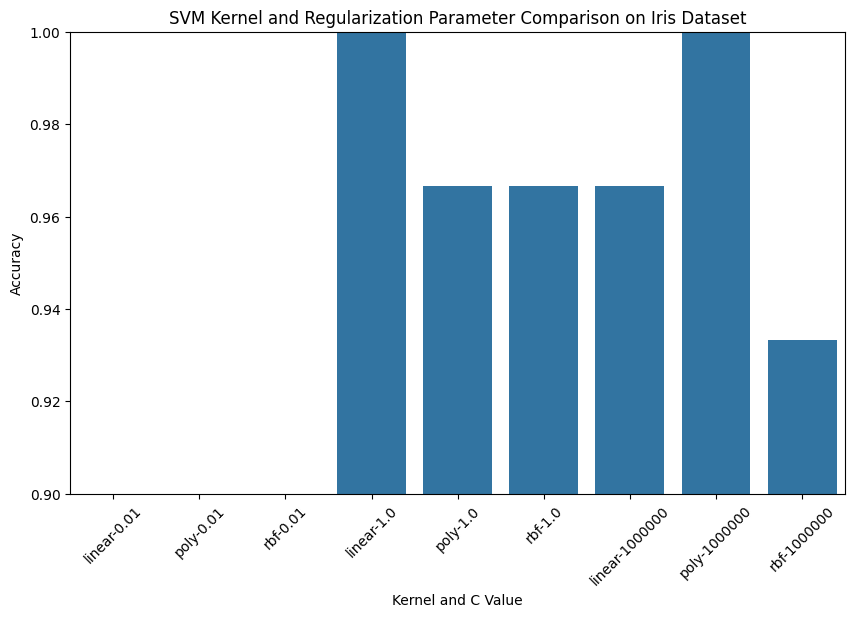

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Iris.csv")
df = df.drop(columns=["Id"], errors='ignore')

label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

X = df.drop(columns=["Species"])
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C_values = [0.01, 1.0, 10**6]
kernels = ["linear", "poly", "rbf"]
results = {}

for C in C_values:
    for kernel in kernels:
        svm_model = SVC(kernel=kernel, C=C, random_state=42)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[(kernel, C)] = accuracy

        print(f"Kernel: {kernel}, C: {C}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
        print("-"*50)

def classify_new_data(model, new_data):
    return model.predict([new_data])

plt.figure(figsize=(10,6))
sns.barplot(x=[f"{k}-{C}" for k, C in results.keys()], y=list(results.values()))
plt.xticks(rotation=45)
plt.xlabel("Kernel and C Value")
plt.ylabel("Accuracy")
plt.title("SVM Kernel and Regularization Parameter Comparison on Iris Dataset")
plt.ylim(0.9, 1.0)
plt.show()
